In [ ]:
from itertools import cycle, product

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-colorblind')

In [17]:
def test_c_cycle(length=6): 
    fig = plt.figure(constrained_layout=True, figsize=(10, 10))
    gs = fig.add_gridspec(4,3)

    axtl = fig.add_subplot(gs[0, 0])
    axtm = fig.add_subplot(gs[0, 1])
    axtr = fig.add_subplot(gs[0, 2])

    axm = fig.add_subplot(gs[1, :])
    axb = fig.add_subplot(gs[2, :], sharex=axm)
    
    cbarax = fig.add_subplot(gs[3, :])

    lines = ["-",":","--","-."]
    linecycler = cycle(lines)

    color = [f"C{n}" for n in range(0, length)]
    colorcycler = cycle(color)

    alpha = [(i)/9 for i in range(3, 9)]
    alpha_cycle = cycle(product(lines, alpha))

    style_cycler = cycle(product(lines, color))

    for i, c in zip(range(length), colorcycler):
        axtl.plot([i,i+1], [0, 20], c=c, linewidth=8)

    for i, s in zip(range(4), linecycler):
        axtm.plot([i,i+1], [0, 20], linestyle=s, c="C0", linewidth=8)

    for i, a in zip(range(6), cycle(alpha)):
        axtr.plot([i,i+1], [0, 20], c="C0", linewidth=8, alpha=a)

    for i, (s, c) in zip(range(24), style_cycler):
        axm.plot([i,i+1], [0, 20], linestyle=s, c=c, linewidth=8)

    for i, (s, a) in zip(range(24), alpha_cycle):
        axb.plot([i,i+1], [0, 20], linestyle=s, c="C0", linewidth=8, alpha=a)
    
    cm = LinearSegmentedColormap.from_list("DarkForest", colour_bar, N=1000)
    data = np.arange(10000, 0, -1).reshape(100, 100)

    im = cbarax.pcolormesh(data, cmap=cm)
    fig.colorbar(im, cax=cbarax, orientation='horizontal')

    

In [18]:
colours = ["ec0025","b8032c","7f0734","3d0b3d","000f46","455078","858ca6","c4c8d4","ffffff"]
colour_bar = [(236/255, 0/255, 37/255), (0/255, 15/255, 70/255), (255/255, 255/255, 255/255)]

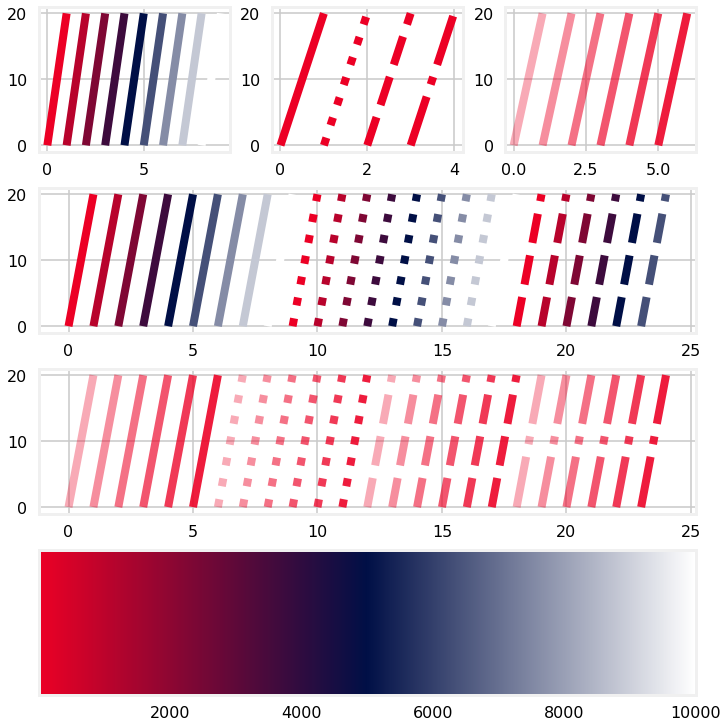

In [19]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours) 
mpl.rcParams['figure.facecolor'] = 'FFFFFF'
mpl.rcParams['axes.facecolor'] = 'FFFFFF'
test_c_cycle(length=len(colours))